In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

### Dataset Preparation

In [4]:
# Load the sklearn mnist dataset
digits = load_digits()


In [5]:
X = digits.data

In [6]:
Y = digits.target

In [7]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


1


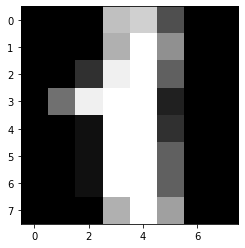

In [8]:
plt.imshow(X[1].reshape((8,8)),cmap="gray")
print(Y[1])
plt.show()

In [9]:
## there are 64 discrete features
print(X[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [10]:
# In gray scale image , there is only one channel, which represents the darkness of color in range of 0-15
# 15 -- Darkest
# 0 -- white

### Train Models

In [11]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [12]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [13]:
# Train
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB()

In [14]:
print(mnb.score(X,Y))

0.9053978853644964


In [15]:
print(gnb.score(X,Y))

0.8580968280467446


In [16]:
# Cross validation score

In [17]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [18]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()



0.8797858472998138

In [19]:
# better result with mnb than gnb because each feature is discrete

## Constructing and visualising Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
Y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_mnb)
print(cnf_matrix)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


- *NOTE* - Diagonal Entries represents # No. of elements where predicted class = Actual class

In [22]:
### Use Directly - adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [23]:
class_label = np.arange(10)

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


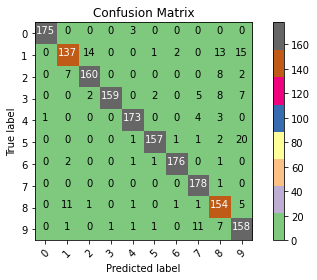

In [25]:
plot_confusion_matrix(cnf_matrix,classes=class_label,normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

## Compare with GaussianNB




In [26]:
Y_mnb = gnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_mnb)
print(cnf_matrix)

[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


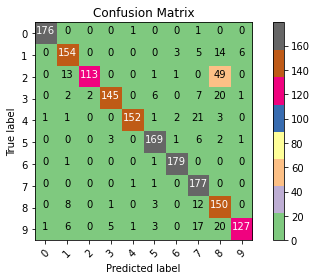

In [27]:
plot_confusion_matrix(cnf_matrix,classes=class_label,normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)

